In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.ensemble import *
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.decomposition import PCA
from scipy.stats import mode
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings("ignore")

In [2]:
airbnb = pd.read_csv("data/train.csv")
airbnb.head()

,id,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,22267382,Modern and Cozy Large Studio in Brooklyn,Modern large studio with new amenities and app...,Our place is a little quiet sanctuary in the h...,Modern large studio with new amenities and app...,none,"BAM, Barclays, Brooklyn City Point, Fort Green...",NaN,"Subway: 2,3,4,5,A,C,B,Q,G",Washer/Dryer Dishwasher Internet Gym Roof Top ...,...,10.0,10.0,10.0,t,f,flexible,f,f,1,0.59
1,2473861,Royal Harlem TRIPLEX Home 5 Beds,Harlem is back and so gorgeous! Visit and expl...,Harlem is back and so gorgeous! Visit and expl...,Harlem is back and so gorgeous! Visit and expl...,none,HARLEM is a piece of real NY history overflowi...,HARLEM RESTAURANTS Red Rooster Harlem -- excel...,PUBLIC TRANSPORTATION: Conveniently near all p...,The WHOLE ENTIRE HOUSE,...,9.0,9.0,9.0,t,f,moderate,f,f,3,2.47
2,25079703,Sunny East Village Studio,"Clean, hip and well designed sun drenched East...",This is a rare East Village studio with it's h...,"Clean, hip and well designed sun drenched East...",none,East Village is one of the last remaining neig...,NaN,NaN,You'll have access to the entire space - it's ...,...,10.0,10.0,10.0,f,f,moderate,f,f,1,0.89
3,9342478,"Beautiful, airy, light-filled room","Private, spacious, comfortable room in 2-bed f...","Big closet, two big windows, tall ceiling and ...","Private, spacious, comfortable room in 2-bed f...",none,One block from Morgan L stop. Super cool area....,NaN,NaN,NaN,...,NaN,NaN,NaN,f,f,flexible,f,f,1,NaN
4,4866426,Private Room in Prime Brooklyn Spot,"Comfy, quiet and big private room in a three b...",This big old apartment that we love and take c...,"Comfy, quiet and big private room in a three b...",none,I absolutely love this neighborhood - right at...,Just a note about the space: The window in you...,Super convenient to almost all subway lines. A...,Your room has a very comfortable queen sized b...,...,10.0,10.0,10.0,f,f,flexible,f,f,1,3.14


In [3]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33538 entries, 0 to 33537
Data columns (total 65 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                33538 non-null  int64  
 1   name                              33526 non-null  object 
 2   summary                           32266 non-null  object 
 3   space                             23038 non-null  object 
 4   description                       33230 non-null  object 
 5   experiences_offered               33538 non-null  object 
 6   neighborhood_overview             19948 non-null  object 
 7   notes                             13447 non-null  object 
 8   transit                           20796 non-null  object 
 9   access                            19304 non-null  object 
 10  interaction                       18670 non-null  object 
 11  house_rules                       19983 non-null  object 
 12  host

In [4]:
airbnb.describe()

,id,host_id,host_acceptance_rate,host_listings_count,accommodates,bathrooms,bedrooms,beds,square_feet,price,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
count,3.353800e+04,3.353800e+04,0.0,33533.000000,33538.000000,33478.000000,33505.000000,33507.000000,341.000000,33538.000000,...,33538.000000,25874.000000,25844.000000,25859.000000,25829.000000,25849.000000,25830.000000,25827.000000,33538.000000,26591.000000
mean,1.566316e+07,5.420691e+07,NaN,10.006799,2.856789,1.141376,1.176869,1.571313,738.958944,145.177291,...,21.635548,93.751488,9.599443,9.255153,9.737466,9.754304,9.500542,9.374647,3.956288,1.429904
std,8.788870e+06,6.149736e+07,NaN,85.869452,1.848491,0.425003,0.744365,1.054226,580.780447,133.085709,...,40.488277,8.315867,0.819684,1.073818,0.706306,0.688775,0.781516,0.888392,12.687366,1.672336
min,2.515000e+03,2.830000e+02,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.010000
25%,8.173466e+06,7.130984e+06,NaN,1.000000,2.000000,1.000000,1.000000,1.000000,400.000000,69.000000,...,1.000000,91.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000,0.210000
50%,1.633786e+07,2.662292e+07,NaN,1.000000,2.000000,1.000000,1.000000,1.000000,700.000000,109.000000,...,5.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,0.770000
75%,2.276632e+07,8.248502e+07,NaN,2.000000,4.000000,1.000000,1.000000,2.000000,1000.000000,175.000000,...,23.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,2.140000
max,2.977318e+07,2.240015e+08,NaN,2271.000000,16.000000,16.500000,10.000000,18.000000,5000.000000,1999.000000,...,557.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,132.000000,19.890000


In [87]:
cols = ["id", "name", "summary", "space", "experiences_offered", 
            "access", "host_acceptance_rate", "notes",
            "description", "neighborhood_overview", "interaction",
            "house_rules", "host_id", "host_name", "host_about",
            "host_location", "city", "state", "zipcode", "country",
            "country_code", "host_response_time", "host_neighbourhood",
            "host_has_profile_pic", "host_listings_count", "market",
            "host_response_rate", "square_feet", "host_verifications",
            "maximum_nights", "calculated_host_listings_count",
            "require_guest_profile_picture", "minimum_nights",
            "is_business_travel_ready", "first_review", "last_review",
           ]
airbnb[airbnb["square_feet"].notnull()].sort_values(by = "square_feet")

,id,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
29746,265831,Sunny unique loft space in best part of Soho,Bright spacious open loft in old two-story pri...,Building: Beautiful downtown loft in an old lo...,Bright spacious open loft in old two-story pri...,none,The best part of Soho bordering on the East Vi...,NaN,"Near all the East side subways, and Citibike h...","The entire apartment is available, and I'm ope...",...,10.0,10.0,10.0,f,f,strict_14_with_grace_period,f,f,1,0.10
17319,651375,"Rare, elegant, sunny and large loft with sauna","Perfect for adult families. Quiet, spacious, c...",SOHO IS EPICENTER OF NYC CULTURE AND ALL SUBWA...,"Perfect for adult families. Quiet, spacious, c...",none,SoHo is the most chic and culturally rich neig...,NaN,Mostly you will be walking around and enjoying...,NaN,...,10.0,10.0,10.0,t,f,moderate,f,f,1,0.75
6747,8069030,Reviews Say It All - 4 Bedroom/ 2 Bath,Four bedrooms available in our fully renovated...,"2500 Sq Feet, Numerous Skylights, Chef's kitch...",Four bedrooms available in our fully renovated...,none,Sub-Urban living in the heart of DownTown Broo...,"15 minute cab ride from LGA (Est -$30 US), 20 ...","Uber, G, C, Q, A Trains, 54 Bus, Yellow/Green ...","Keyless entry, 2 Flight walk up",...,10.0,10.0,10.0,f,f,strict_14_with_grace_period,f,f,2,3.49
27711,28541165,Budget cave!,Hello everyone!! We are Javier and Jorge. We a...,"Welcome to our brand new apartment, located in...",Hello everyone!! We are Javier and Jorge. We a...,none,NaN,NaN,NaN,"Guest have access to the whole place. ""Mi casa...",...,10.0,10.0,10.0,f,f,moderate,t,f,2,1.50
4123,624222,"Spacious apt in South Harlem, steps to subways !","2 bedroom apartment in a new, quiet and secure...","•Located in South-Harlem (SoHa), this is a gre...","2 bedroom apartment in a new, quiet and secure...",none,Short walk to Central Park and restaurant rows...,NaN,15 Minutes from Times Square (Express train is...,NaN,...,10.0,9.0,9.0,f,f,strict_14_with_grace_period,f,f,2,0.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27055,273190,HUGE 6 bedroom Landmark house NYC,Listed here is an entire 6 bedroom townhouse i...,Listed here is an entire 6 bedroom Townhouse i...,Listed here is an entire 6 bedroom townhouse i...,none,"The West village is famous for small cafes, re...",Welcome to 298 Bleecker Street!We are happy to...,Exploring the neighborhood by foot is always t...,WIFI Network Bleecker5g Password is 298bleecker,...,10.0,10.0,9.0,t,f,moderate,f,f,4,0.34
31183,946644,Your own luxurious private floor in my duplex apt,"Spacious and modern with unique furniture , th...","The apartment is very spacious, around 1000 sq...","Spacious and modern with unique furniture , th...",none,I love my neighborhood as there's so much beau...,"We share the same entrance, but the staircase ...",You have the JMZ and the A train and of course...,Guests have their private floor and outdoor te...,...,10.0,9.0,9.0,f,f,strict_14_with_grace_period,f,f,1,1.91
33451,530135,"Room 3, Victorian Home to Enjoy!","So excited to welcome you to Ditmas Park, Broo...",Come and stay with our family in our 120 year ...,"So excited to welcome you to Ditmas Park, Broo...",none,Please come and enjoy our wonderful and divers...,Room 3 is beside the bathroom. I ask guests no...,Our house is located between two Q subway stat...,"Guests have access to the porch, parlor, livin...",...,10.0,10.0,10.0,t,f,moderate,f,f,6,1.61
28026,530074,"Room 2, Victorian Home to Enjoy!",So excited to welcome you to Brooklyn and our ...,Come and stay with our family in our 120 year ...,So excited to welcome you to Brooklyn and our ...,none,Please come and enjoy our wonde

In [31]:
# 初步drop缺失值过多、长段文字、或者host-unique的features
def drop_initial(df): 
    cols = ["id", "name", "summary", "space", "experiences_offered", 
            "access", "host_acceptance_rate", "notes",
            "description", "neighborhood_overview", "interaction",
            "house_rules", "host_id", "host_name", "host_about",
            "host_location", "city", "state", "zipcode", "country",
            "country_code", "host_response_time", "host_neighbourhood",
            "host_has_profile_pic", "host_listings_count", "market",
            "host_response_rate", "square_feet", "host_verifications",
            "maximum_nights", "calculated_host_listings_count",
            "require_guest_profile_picture", "minimum_nights",
            "is_business_travel_ready", "first_review", "last_review",
           ]
    return df.drop(cols,  axis = 1)

In [32]:
def to_num(df):
    df["extra_people"] = df.extra_people.str.replace("$", "", regex = False).astype(float)
    return df

In [33]:
def remove_outliers(data):
    df = data.copy(deep = True)
    df = df[(df["reviews_per_month"] < 10) | (df["reviews_per_month"].isnull())]
    df = df[(df["bathrooms"] < 10) | (df["bathrooms"].isnull())]
    df = df[(df["review_scores_cleanliness"] > 2) | (df["review_scores_cleanliness"].isnull())]
    df = df[(df["review_scores_accuracy"] > 2) | (df["review_scores_accuracy"].isnull())]
    df = df[(df["review_scores_location"] > 2) | (df["review_scores_location"].isnull())]
    df = df[(df["review_scores_checkin"] > 2) | (df["review_scores_checkin"].isnull())]
    df = df[(df["review_scores_communication"] > 2) | (df["review_scores_communication"].isnull())]
    df = df[(df["review_scores_value"] > 2) | (df["review_scores_value"].isnull())]
    df = df[(df["number_of_reviews"] < 300) | (df["number_of_reviews"].isnull())]
    return df

In [13]:
# for col in cur.columns:
#     if isinstance(cur[col][0], str) :
#         print("----------%s----------"%col)
#         print(cur[col].value_counts(dropna=False))

In [38]:
# 进行feature tranformation
def engineer_features(df):
    # transform host_since
    since = pd.to_datetime(df["host_since"]).dt
    df = df.drop("host_since", axis = 1)
    df["since"] = since.year
    # transform binary columns
    tfmap = {"f": 0, "t": 1}
    df["host_is_superhost"] = df["host_is_superhost"].fillna("f").map(tfmap)
    df["host_identity_verified"] = df["host_identity_verified"].fillna("f").map(tfmap)
    df["require_guest_phone_verification"] = df["require_guest_phone_verification"].map(tfmap)
    df["instant_bookable"] = df["instant_bookable"].map(tfmap)
    # transform amenities
    df["amenities"] = airbnb["amenities"].str.replace("{", "", regex = False)\
                                             .replace("}", "", regex = False)\
                                             .str.split(",").apply(len)
    df["transit"] = df["transit"].apply(lambda x: 0 if pd.isnull(x) else 1)
    # transform property types
    ptmap = {"Villa":"Other",
             "Bungalow":"Other",
             "Tiny house":"Other",
             "Aparthotel":"Other",
             "Boat":"Other",
             "Camper/RV":"Other",
             "Tent":"Other",
             "Cottage":"Other",
             "Houseboat":"Other",
             "Cabin":"Other",
             "Chalet":"Other",
             "Timeshare":"Other",
             "Train":"Other",
             "Island":"Other",
             "Casa particular (Cuba)":"Other"}
    df["property_type"].replace(ptmap, inplace = True)
    # transforom cancellation policy
    cpmap = {"super_strict_60": "strict",
             "super_strict_30": "strict",
             "strict": "strict",
             "long_term": "strict"}
    df["cancellation_policy"].replace(cpmap, inplace = True)
    # na
    return df

In [39]:
engineer_features(airbnb)

,id,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,...,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,since
0,22267382,Modern and Cozy Large Studio in Brooklyn,Modern large studio with new amenities and app...,Our place is a little quiet sanctuary in the h...,Modern large studio with new amenities and app...,none,"BAM, Barclays, Brooklyn City Point, Fort Green...",NaN,1,Washer/Dryer Dishwasher Internet Gym Roof Top ...,...,10.0,10.0,1,f,flexible,f,0,1,0.59,2012.0
1,2473861,Royal Harlem TRIPLEX Home 5 Beds,Harlem is back and so gorgeous! Visit and expl...,Harlem is back and so gorgeous! Visit and expl...,Harlem is back and so gorgeous! Visit and expl...,none,HARLEM is a piece of real NY history overflowi...,HARLEM RESTAURANTS Red Rooster Harlem -- excel...,1,The WHOLE ENTIRE HOUSE,...,9.0,9.0,1,f,moderate,f,0,3,2.47,2013.0
2,25079703,Sunny East Village Studio,"Clean, hip and well designed sun drenched East...",This is a rare East Village studio with it's h...,"Clean, hip and well designed sun drenched East...",none,East Village is one of the last remaining neig...,NaN,0,You'll have access to the entire space - it's ...,...,10.0,10.0,0,f,moderate,f,0,1,0.89,2012.0
3,9342478,"Beautiful, airy, light-filled room","Private, spacious, comfortable room in 2-bed f...","Big closet, two big windows, tall ceiling and ...","Private, spacious, comfortable room in 2-bed f...",none,One block from Morgan L stop. Super cool area....,NaN,0,NaN,...,NaN,NaN,0,f,flexible,f,0,1,NaN,2013.0
4,4866426,Private Room in Prime Brooklyn Spot,"Comfy, quiet and big private room in a three b...",This big old apartment that we love and take c...,"Comfy, quiet and big private room in a three b...",none,I absolutely love this neighborhood - right at...,Just a note about the space: The window in you...,1,Your room has a very comfortable queen sized b...,...,10.0,10.0,0,f,flexible,f,0,1,3.14,2012.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33533,3958032,Private Room Amazing View in EV,"Private room in cozy, sun-drenched & plant fil...",NaN,"Private room in cozy, sun-drenched & plant fil...",none,NaN,NaN,0,NaN,...,9.0,8.0,0,f,strict_14_with_grace_period,f,0,1,0.44,2012.0
33534,7987209,Floor 35th in the heart of New York,This is a beautiful four bedroom and three bat...,This is a Duplex Apartment (2 floors) Main Flo...,This is a beautiful four bedroom and three bat...,none,LOCATION LOCATION LOCATION. Walk to Time Squar...,NaN,1,Access to the unit is through elevators.,...,10.0,9.0,0,f,strict_14_with_grace_period,f,0,1,2.28,2015.0
33535,796128,Cozy room for rent in duplex house,NaN,Room for rent in duplex house located in Astor...,Room for rent in duplex house located in Astor...,none,NaN,NaN,0,NaN,...,NaN,NaN,0,f,flexible,f,0,1,NaN,2012.0
33536,17281121,"Beautiful 1 bedroom apart, Washington Heights",Very spacious bright beautiful apartment in Wa...,"Very spacious living room, bright kitchen with...",Very spacious bright beautiful apartment in Wa...,none,Very close to Times Square but a quiet residen...,NaN,1,"Living room, bedroom, shared kitchen and bathr...",...,10.0,10.0,0,f,moderate,f,0,3,0.10,2014.0


In [37]:
if np.nan:
    print(1)

1


In [40]:
def fill_missing(df):
    df["bathrooms"] = df.groupby("room_type")["bathrooms"].transform(lambda x: x.fillna(mode(x).mode[0]))
    df["bedrooms"] = df.groupby("accommodates")["bedrooms"].transform(lambda x: x.fillna(mode(x).mode[0]))
    df["beds"] = df.groupby("accommodates")["beds"].transform(lambda x: x.fillna(mode(x).mode[0]))
    df["since"] = df["since"].fillna(mode(df["since"]).mode[0])
    tofill = ["review_scores_rating",
    "review_scores_accuracy",
    "review_scores_cleanliness",
    "review_scores_checkin",
    "review_scores_communication",
    "review_scores_location",
    "review_scores_value",
    "reviews_per_month"         
    ]
    for i in tofill:
        df[i] = df[i].fillna(np.mean(df[i]))
    return df

In [55]:
def pre_transformation(df):
    res = drop_initial(df)
    res = to_num(res)
    res = remove_outliers(res)
    res = engineer_features(res)
    res = fill_missing(res)
    return res

In [42]:
pre_transformation(airbnb)

,transit,host_is_superhost,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_phone_verification,reviews_per_month,since
0,1,0,1,Fort Greene,Brooklyn,Loft,Entire home/apt,2,1.0,1.0,...,10.000000,10.000000,10.000000,10.000000,10.000000,1,flexible,0,0.590000,2012.0
1,1,0,1,Harlem,Manhattan,House,Entire home/apt,8,1.0,3.0,...,9.000000,9.000000,9.000000,9.000000,9.000000,1,moderate,0,2.470000,2013.0
2,0,0,1,East Village,Manhattan,Apartment,Entire home/apt,2,1.0,0.0,...,9.000000,9.000000,10.000000,10.000000,10.000000,0,moderate,0,0.890000,2012.0
3,0,0,1,Williamsburg,Brooklyn,Apartment,Private room,1,1.0,1.0,...,9.255153,9.737466,9.754304,9.500542,9.374647,0,flexible,0,1.429904,2013.0
4,1,1,1,Boerum Hill,Brooklyn,Apartment,Private room,2,1.0,1.0,...,10.000000,10.000000,10.000000,10.000000,10.000000,0,flexible,0,3.140000,2012.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33533,0,0,1,East Village,Manhattan,Apartment,Private room,2,1.0,1.0,...,8.000000,9.000000,9.000000,9.000000,8.000000,0,strict_14_with_grace_period,0,0.440000,2012.0
33534,1,0,1,Theater District,Manhattan,Serviced apartment,Entire home/apt,8,3.0,4.0,...,9.000000,10.000000,10.000000,10.000000,9.000000,0,strict_14_with_grace_period,0,2.280000,2015.0
33535,0,0,1,Woodside,Queens,House,Private room,1,1.0,1.0,...,9.255153,9.737466,9.754304,9.500542,9.374647,0,flexible,0,1.429904,2012.0
33536,1,0,1,Washington Heights,Manhattan,Apartment,Private room,2,1.0,1.0,...,10.000000,10.000000,10.000000,10.000000,10.000000,0,moderate,0,0.100000,2014.0


In [52]:
pre_transformation(airbnb).describe()

,transit,host_is_superhost,host_identity_verified,accommodates,bathrooms,bedrooms,beds,amenities,price,guests_included,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,require_guest_phone_verification,reviews_per_month,since
count,33538.000000,33538.000000,33538.000000,33538.000000,33538.000000,33538.000000,33538.000000,33538.000000,33538.000000,33538.000000,...,33538.000000,33538.000000,33538.000000,33538.000000,33538.000000,33538.000000,33538.000000,33538.000000,33538.000000,33538.000000
mean,0.620073,0.164768,0.501908,2.856789,1.141124,1.176695,1.570845,19.959419,145.177291,1.503190,...,9.599443,9.255153,9.737466,9.754304,9.500542,9.374647,0.343372,0.026865,1.429904,2014.491174
std,0.485376,0.370977,0.500004,1.848491,0.424665,0.744019,1.053878,9.602096,133.085709,1.114226,...,0.719541,0.942901,0.619835,0.604685,0.685850,0.779599,0.474841,0.161691,1.489088,2.124617
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.010000,2008.000000
25%,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,13.000000,69.000000,1.000000,...,9.599443,9.000000,9.737466,9.754304,9.000000,9.000000,0.000000,0.000000,0.300000,2013.000000
50%,1.000000,0.000000,1.000000,2.000000,1.000000,1.000000,1.000000,18.000000,109.000000,1.000000,...,10.000000,9.255153,10.000000,10.000000,9.500542,9.374647,0.000000,0.000000,1.300000,2015.000000
75%,1.000000,0.000000,1.000000,4.000000,1.000000,1.000000,2.000000,25.000000,175.000000,2.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,0.000000,1.680000,2016.000000
max,1.000000,1.000000,1.000000,16.000000,16.500000,10.000000,18.000000,82.000000,1999.000000,16.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.000000,19.890000,2018.000000


In [43]:
pt = pre_transformation(airbnb)

In [44]:
# Column transformer
categorical = ["neighbourhood_cleansed", "neighbourhood_group_cleansed", "property_type", "room_type", "bed_type", "cancellation_policy"]
std= ["accommodates", "bathrooms", "bedrooms", "beds", "amenities"]
clt = ColumnTransformer(
    transformers=[
        ("one-hot", OneHotEncoder(handle_unknown="ignore", sparse=False), categorical),
        ("standardization", StandardScaler(), )
    ],
    remainder="passthrough"
)
clt.fit(pt.drop("price", axis = 1))



ColumnTransformer(remainder='passthrough',
                  transformers=[('one-hot',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 ['neighbourhood_cleansed',
                                  'neighbourhood_group_cleansed',
                                  'property_type', 'room_type', 'bed_type',
                                  'cancellation_policy'])])

In [45]:
def preprocessing(df):
    pt = pre_transformation(df)
    try:
        pt.drop("price", axis = 1)
    except:
        return clt.transform(pt)
    X = pt.drop("price", axis = 1)
    y = pt.price
    res = clt.transform(X)
    return res, y

# MODEL FITTING

In [ ]:
noutliers = drop_initial(airbnb)
noutliers = to_num(noutliers)
noutliers = engineer_features(noutliers)
noutliers = fill_missing(noutliers)
# Column transformer
categorical = ["neighbourhood_cleansed", "neighbourhood_group_cleansed", "property_type", "room_type", "bed_type", "cancellation_policy"]
clt = ColumnTransformer(
    transformers=[
        ("one-hot", OneHotEncoder(handle_unknown="ignore", sparse=False), categorical),
    ],
    remainder="passthrough"
)
clt.fit(noutliers.drop("price", axis = 1))
X_no = clt.transform(noutliers.drop("price", axis = 1))
y_no = noutliers.price

In [21]:
from sklearn import metrics
import xgboost as xgb
import lightgbm as lgb

In [138]:

best_depth = [5,6,7,8, 9]
best_min_cw = [4,5,6]
res = []
for i in best_depth:
    for j in best_depth:
        xgbr = xgb.XGBRegressor(max_depth=i, learning_rate=0.1, n_estimators=100, min_child_weight = j)
        res.append([i, j, -(cross_val_score(xgbr, X_no, y_no, cv = 5, scoring="neg_root_mean_squared_error").mean())])


In [139]:
res

[[5, 5, 87.5400921552656],
 [5, 6, 87.47434294784705],
 [5, 7, 87.5732672117617],
 [5, 8, 87.61270405675933],
 [5, 9, 87.60376728865465],
 [6, 5, 87.05424578331551],
 [6, 6, 87.09120019434579],
 [6, 7, 87.11696295860519],
 [6, 8, 86.97888610964925],
 [6, 9, 87.19883051345474],
 [7, 5, 86.66807033247866],
 [7, 6, 86.71333910441851],
 [7, 7, 86.94823692983043],
 [7, 8, 86.79621116778732],
 [7, 9, 86.73004185158625],
 [8, 5, 87.03691202652516],
 [8, 6, 86.97971229277343],
 [8, 7, 86.71802777496976],
 [8, 8, 86.93217005932158],
 [8, 9, 86.86371034904343],
 [9, 5, 87.46502548890979],
 [9, 6, 87.38023618571452],
 [9, 7, 87.09221546681059],
 [9, 8, 87.19309740252709],
 [9, 9, 86.91297775127288]]

In [71]:
import lightgbm as lgb
res = []
best_max_dp = [10,11,12,13]
best_min_data_in_leaf = [16, 17, 18,19, 20]
num_leaves = [50,55,60, 65, 70]
for i in best_min_data_in_leaf:
    for j in num_leaves:
        for k in best_max_dp:
            gbm = lgb.LGBMRegressor(max_depth=k, min_data_in_leaf = i, num_leaves = j)
            res.append([i, j,k, -(cross_val_score(gbm, X, y, cv = 5, scoring="neg_root_mean_squared_error").mean())])

[LightGBM] [Warning] min_data_in_leaf is set=16, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=16
[LightGBM] [Warning] min_data_in_leaf is set=16, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=16
[LightGBM] [Warning] min_data_in_leaf is set=16, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=16
[LightGBM] [Warning] min_data_in_leaf is set=16, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=16
[LightGBM] [Warning] min_data_in_leaf is set=16, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=16
[LightGBM] [Warning] min_data_in_leaf is set=16, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=16
[LightGBM] [Warning] min_data_in_leaf is set=16, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=16
[LightGBM] [Warning] min_data_in_leaf is set=16, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=16
[LightGBM] [Warning] min

KeyboardInterrupt: 

In [153]:
best = 1000
best1 = 0
for i in res:
    if i[-1] < best:
        best = i[-1]
        best1 = i
best1

[17, 55, 10, 86.170605808802]

[5.7,
 5.711111111111111,
 5.722222222222222,
 5.733333333333333,
 5.7444444444444445,
 5.7555555555555555,
 5.766666666666667,
 5.777777777777778,
 5.788888888888889,
 5.8]

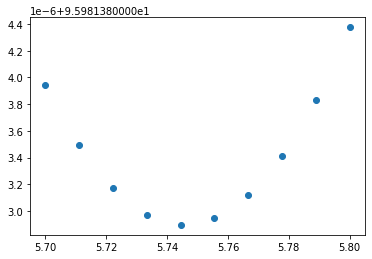

In [171]:
from sklearn.linear_model import Ridge
scr = []
alpha = []
for i in np.linspace(5.7, 5.8, 10):
    ridge = Ridge(alpha = i)
    score = -(cross_val_score(ridge, X_no, y_no, cv = 5, scoring="neg_root_mean_squared_error").mean())
    scr.append(score)
    alpha.append(i)
plt.scatter(x=alpha, y = scr)
alpha

In [ ]:
from sklearn.ensemble import RandomForestRegressor
depth = [2,3,4]
res = []
for d in depth:
    rdf = RandomForestRegressor(n_estimators=50, max_depth=14)
    res.append(-(cross_val_score(rdf, X, y, cv = 5, scoring="neg_root_mean_squared_error").mean()))
plt.scatter(depth, res)

In [64]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor(base_estimator=Ridge(alpha=10), n_estimators=10, learning_rate=0.5)
-(cross_val_score(ada, X, y, cv = 5, scoring="neg_root_mean_squared_error").mean())

106.01294348317917

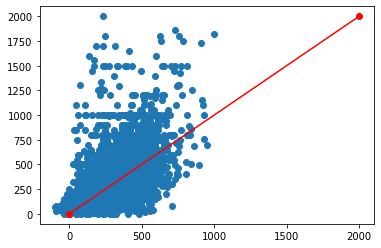

In [69]:
plt.scatter(x=ada.fit(X, y).predict(X), y=y)
plt.plot([0, 2000], [0, 2000], marker = "o", zorder = 3, color="red")

In [ ]:
def pred_plot(model):
    model.fit(X, y)
    plt.scatter(x=model.predict(X), y = y)
    plt.plot([0, 2000], [0, 2000], marker = "o", zorder = 3, color="red")

In [ ]:
pred_plot(RandomForestRegressor(n_estimators=50, max_depth=14))


In [ ]:
import xgboost as xgb
pred_plot(xgb.XGBRegressor(max_depth=6, learning_rate=0.1, n_estimators=100, min_child_weight = 5))

In [ ]:
mod.predict(X)

In [ ]:
plt.scatter(x=mod.predict(X), y = y)
plt.plot([0, 2000], [0, 2000], marker = "o", zorder = 3, color="red")

In [ ]:
preprocessing(test)

In [5]:
final = pd.read_csv("data/test.csv")
final.head()

c:\users\zhaow\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (30) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,19307997,Super Lux 2BR in Downtown Manhattan,Prepare to be WOWED! This spectacularly bright...,"Top of the line Wolf and Sub-Zero appliances, ...",Prepare to be WOWED! This spectacularly bright...,none,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,f,f,flexible,f,f,1,NaN
1,20176193,Vintage Eclectic Brownstone Pad in Brooklyn,"Ideal for romantic, creative types, this is an...","Not your typical New York abode, my apartment ...","Ideal for romantic, creative types, this is an...",none,Bed Stuy is a diverse historic neighborhood wi...,This is an actual unique living experience whe...,Close to buses and subways there is also free ...,"Entrance hallway, living room, bedroom, kitche...",...,10.0,10.0,10.0,f,f,flexible,f,f,1,1.48
2,19485371,Spacious Harlem Hideaway,"Postive Vibes . This is our Harlem tree house,...",The private room is very spacious and cozy. Th...,"Postive Vibes . This is our Harlem tree house,...",none,You are in a Cultural Haven full of restaurant...,We also keep cucumber water in the fridge feel...,"Train, uber or a taxi. (Extremely taxi accessi...","Private Room, Kitchen And Bathroom",...,10.0,10.0,10.0,t,f,flexible,f,f,1,0.37
3,13079990,Spacius private room in Brooklyn,"Newly renovated apartment, its a 3 bedroom apa...","3 bedroom apartment, 1 full bathroom, living r...","Newly renovated apartment, its a 3 bedroom apa...",none,NaN,NaN,"There is the Mta 3 train Sutter stop, also the...",NaN,...,9.0,8.0,9.0,f,f,flexible,f,f,1,0.23
4,22339757,*Dg) Delightful Private Room 20 min to Manhattan,Hi my home is only 2 blocks from the subway st...,NaN,Hi my home is only 2 blocks from the subway st...,none,NaN,NaN,NaN,NaN,...,8.0,8.0,8.0,t,f,strict_14_with_grace_period,f,f,9,1.53


In [56]:

test = preprocessing(final)
X, y = preprocessing(airbnb)

In [ ]:
test = test_preprocessing(final)

In [ ]:
import xgboost as xgb
xgbr = xgb.XGBRegressor(max_depth=6, learning_rate=0.1, n_estimators=100, min_child_weight = 5)
mod = xgbr.fit(X, y)

In [ ]:
res = mod.predict(test)
res

In [ ]:
test = drop_initial(final)
test = to_num(test)
test = engineer_features(test)
test = clt.transform(test)

In [ ]:
def to_csv(model, df = final):
    test = drop_initial(final)
    test = to_num(test)
    test = engineer_features(test)
    test = fill_missing(test)
    test = clt.transform(test)
    prediction = final[["id"]].set_index("id")
    prediction["Predicted"] = model.predict(test)
    prediction.to_csv("prediction.csv")

In [ ]:
to_csv()

In [ ]:
prediction = final[["id"]].set_index("id")
prediction["Predicted"] = res
prediction.to_csv("data/prediction.csv")

In [61]:
test = drop_initial(final)
test = to_num(test)
test = engineer_features(test)
test = fill_missing(test)
test = clt.transform(test)
prediction = final[["id"]].set_index("id")
ridge_pred = Ridge(alpha = 5.75).fit(X, y).predict(test)*0.1
lgb_pred=lgb.LGBMRegressor(max_depth=17, min_data_in_leaf = 23).fit(X, y).predict(test)*0.4
xgb_pred =xgb.XGBRegressor(max_depth=7, learning_rate=0.1, n_estimators=100, min_child_weight = 5).fit(X, y).predict(test)*0.5
prediction["Predicted"] = lgb_pred+xgb_pred+ridge_pred
prediction.to_csv("output/prediction.csv")

[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23


In [183]:
final

,id,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,19307997,Super Lux 2BR in Downtown Manhattan,Prepare to be WOWED! This spectacularly bright...,"Top of the line Wolf and Sub-Zero appliances, ...",Prepare to be WOWED! This spectacularly bright...,none,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,f,f,flexible,f,f,1,NaN
1,20176193,Vintage Eclectic Brownstone Pad in Brooklyn,"Ideal for romantic, creative types, this is an...","Not your typical New York abode, my apartment ...","Ideal for romantic, creative types, this is an...",none,Bed Stuy is a diverse historic neighborhood wi...,This is an actual unique living experience whe...,Close to buses and subways there is also free ...,"Entrance hallway, living room, bedroom, kitche...",...,10.0,10.0,10.0,f,f,flexible,f,f,1,1.48
2,19485371,Spacious Harlem Hideaway,"Postive Vibes . This is our Harlem tree house,...",The private room is very spacious and cozy. Th...,"Postive Vibes . This is our Harlem tree house,...",none,You are in a Cultural Haven full of restaurant...,We also keep cucumber water in the fridge feel...,"Train, uber or a taxi. (Extremely taxi accessi...","Private Room, Kitchen And Bathroom",...,10.0,10.0,10.0,t,f,flexible,f,f,1,0.37
3,13079990,Spacius private room in Brooklyn,"Newly renovated apartment, its a 3 bedroom apa...","3 bedroom apartment, 1 full bathroom, living r...","Newly renovated apartment, its a 3 bedroom apa...",none,NaN,NaN,"There is the Mta 3 train Sutter stop, also the...",NaN,...,9.0,8.0,9.0,f,f,flexible,f,f,1,0.23
4,22339757,*Dg) Delightful Private Room 20 min to Manhattan,Hi my home is only 2 blocks from the subway st...,NaN,Hi my home is only 2 blocks from the subway st...,none,NaN,NaN,NaN,NaN,...,8.0,8.0,8.0,t,f,strict_14_with_grace_period,f,f,9,1.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17332,22325617,Charming room in Brooklyn,Charming newly renovated 2 bed apartment in Be...,NaN,Charming newly renovated 2 bed apartment in Be...,none,NaN,NaN,"Though street parking is available, space is 2...",NaN,...,NaN,NaN,NaN,t,f,flexible,f,f,1,NaN
17333,8372650,Luxurious 1BR in Herald Square,"-Apartment includes: Hardwood Floors, High Cei...",- ONE proper bed that can sleep 2. - ONE plush...,"-Apartment includes: Hardwood Floors, High Cei...",none,Smack in the middle of Manhattan. Near the Emp...,NaN,NaN,NaN,...,NaN,NaN,NaN,f,f,strict_14_with_grace_period,f,f,1,NaN
17334,3812554,"Master Bedrm, Steam Shr/Jacuzzi, FH","Elegant room w/AC, King Bed, Jacuzzi and Steam...",This stately red brick federal on a quiet stre...,"Elegant room w/AC, King Bed, Jacuzzi and Steam...",none,It's easy to enjoy all that NYC has to offer f...,Guests are expected to respect others' needs f...,A three block walk to the Forest Hills/71st Rd...,Guests have access to the common areas of the ...,...,10.0,10.0,10.0,f,f,moderate,f,f,3,1.32
17335,18891508,Private rooms starting at $67 a night per person.,Family friendly neighborhood. Caribbean settin...,You have a choice of 1 of 4 bedrooms. Room#4 c...,Family friendly neighborhood. Caribbean settin...,none,The neighborhood has easy access to Manhattan....,Our place can also be available for $249 a nig...,Buses are 1 block away. A 10 minute ride in th...,"Coffee, tea, cocoa and various juices are prov...",...,10.0,9.0,10.0,f,f,moderate,f,f,4,0.29


In [181]:
Ridge().fit(X_no, y_no).predict(test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [185]:
drop_initial(final).isnull().sum()

host_since                             3
host_is_superhost                      3
host_identity_verified                 3
neighbourhood_cleansed                 0
neighbourhood_group_cleansed           0
property_type                          0
room_type                              0
accommodates                           0
bathrooms                             36
bedrooms                              23
beds                                  28
bed_type                               0
amenities                              0
guests_included                        0
extra_people                           0
number_of_reviews                      0
review_scores_rating                4002
review_scores_accuracy              4021
review_scores_cleanliness           4015
review_scores_checkin               4033
review_scores_communication         4020
review_scores_location              4041
review_scores_value                 4037
instant_bookable                       0
cancellation_pol